In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [121]:
dataset=pd.read_csv('housesalesKC.csv')

In [122]:
dataset.shape

(21613, 21)

In [123]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [125]:
dataset['date']=pd.to_datetime(dataset['date'])
dataset['date']=pd.to_datetime(dataset['date'],format='%yyyy%mm%dd')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [126]:
#converting the date to datetime format and using only the year in the 'date_year' column
dataset['date_year']=pd.DatetimeIndex(dataset['date']).year
x=dataset.drop(columns=['id','date'])
x.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [127]:
# Adding a column name 'Year old' which gives the age of house and 
# replacing the data of the 'yr-renovated' with the years it has been revovated before selling.

x['Year old']=x['date_year']-x['yr_built']
x['yr_renovated']=np.where(x['yr_renovated']==0,0,(x['date_year']-x['yr_renovated']))

In [128]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,23,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


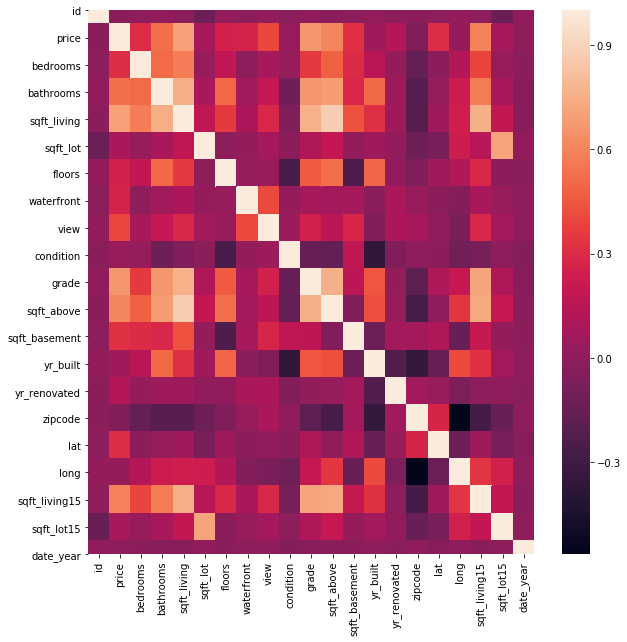

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [130]:
x.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
sqft_lot         0.089661
sqft_lot15       0.082447
yr_renovated     0.067177
yr_built         0.054012
condition        0.036362
long             0.021626
date_year        0.003576
zipcode         -0.053203
Year old        -0.053951
Name: price, dtype: float64

In [131]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,23,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [132]:
x.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,0.779947,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,4.895330,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,-1.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,80.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000


In [133]:
# age can never be in negative therefore we will removing the rows with negative age
ind=x[x['Year old']==-1].index
(x.loc[ind])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
1763,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,-1
2687,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,47.5756,-122.316,1440,4800,2014,-1
7526,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,2014,-1
8039,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,2014,-1
14489,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,-1
17098,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,2014,-1
19805,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,2014,-1
20770,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,-1
20852,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,2014,-1
20963,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,47.5951,-122.301,1350,3000,2014,-1


In [134]:
x.drop(x[x['Year old']==-1].index,inplace=True)
x.shape

(21601, 21)

In [135]:
x.drop(columns='yr_built')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,23,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,98146,47.5107,-122.362,1830,7200,2015,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,98144,47.5944,-122.299,1020,2007,2014,5
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,98027,47.5345,-122.069,1410,1287,2015,11


In [136]:
x

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,23,98125,47.7210,-122.319,1690,7639,2014,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


In [137]:
#dividing the numerical features in discrete and continuous

for i in x.columns:
    print(i,len(x[i].unique()))
    
discrete_fea=[fea for fea in x.columns if len(x[fea].unique())<31]
temporal_fea=['date_year','yr_built','yr_renovated']
conti_fea=[fea for fea in x.columns if fea not in  (discrete_fea + temporal_fea)]




price 4025
bedrooms 13
bathrooms 30
sqft_living 1038
sqft_lot 9779
floors 6
waterfront 2
view 5
condition 5
grade 12
sqft_above 946
sqft_basement 306
yr_built 116
yr_renovated 71
zipcode 70
lat 5033
long 752
sqft_living15 777
sqft_lot15 8688
date_year 2
Year old 116


In [138]:
conti_fea

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Year old']

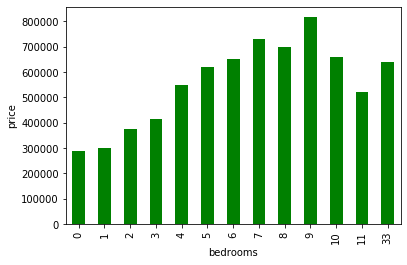

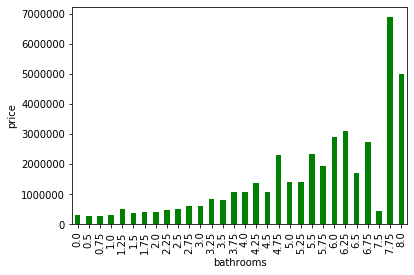

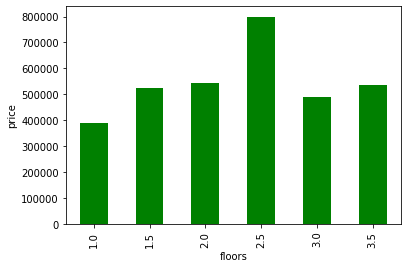

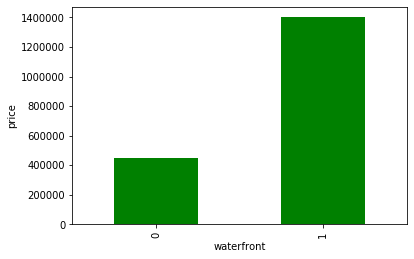

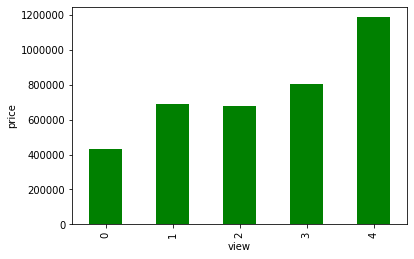

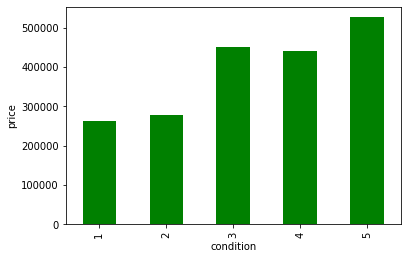

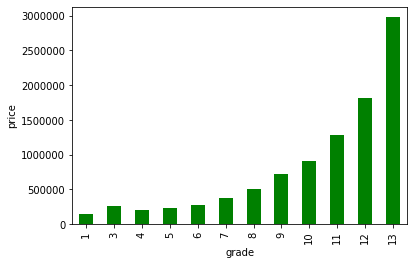

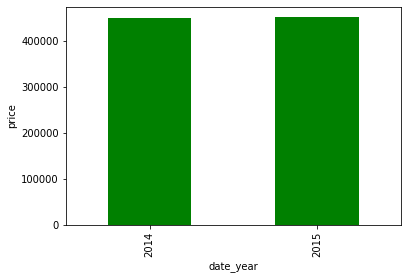

In [139]:
# relationship between Sale price and discrete variables
for fea in discrete_fea:
    x.groupby(fea)['price'].median().plot.bar(color='g')
    plt.ylabel('price')
    plt.show()

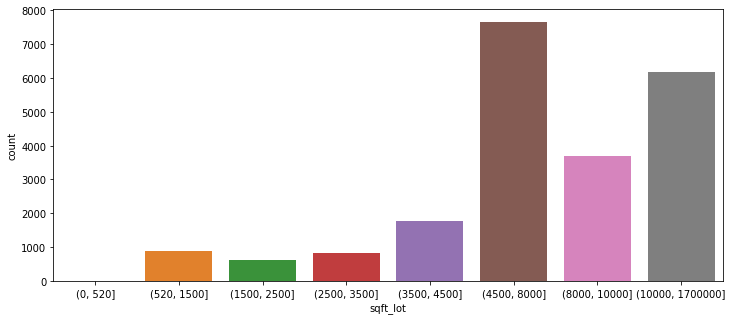

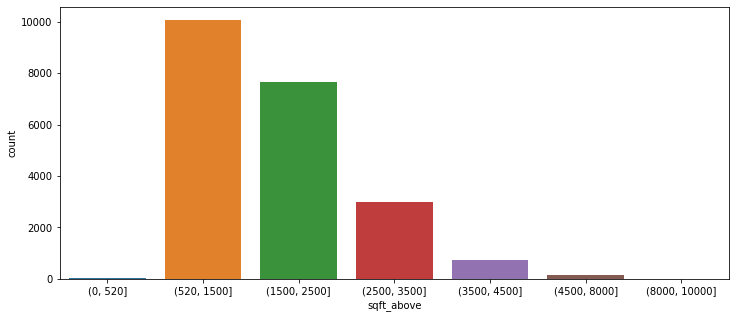

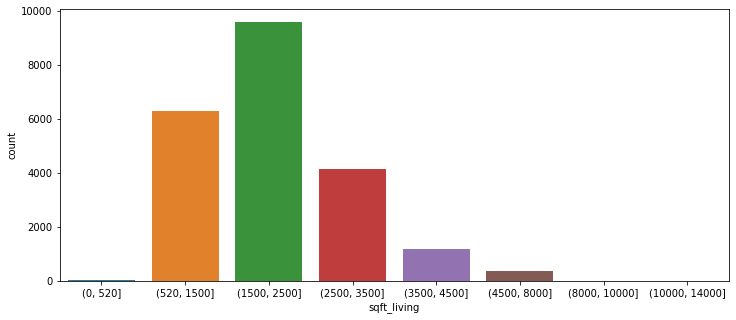

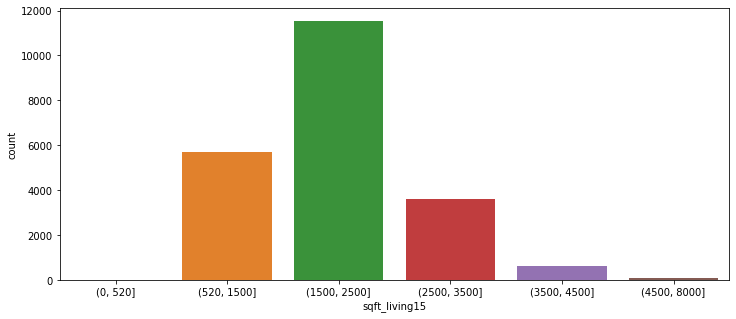

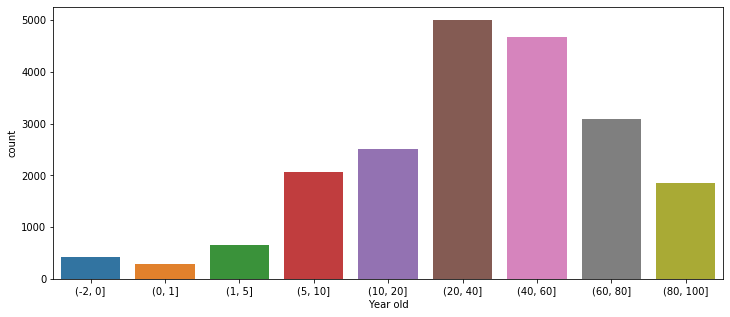

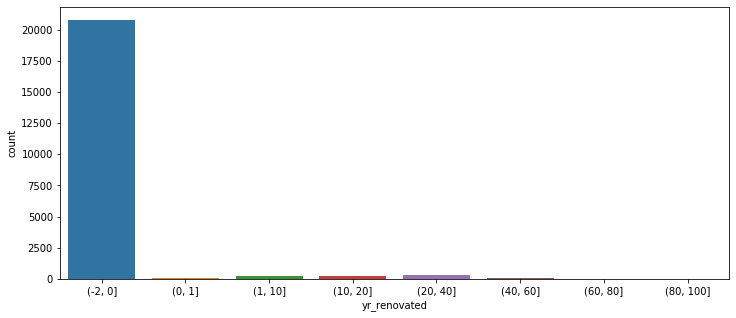

In [140]:
for fea in ['sqft_lot','sqft_above','sqft_living','sqft_living15','Year old','yr_renovated']:
    plt.figure(figsize=(12,5))
    if fea=='sqft_lot':
        bins=[0,520,1500,2500,3500,4500,8000,10000,1700000]

    elif fea == 'sqft_above':
        bins=[0,520,1500,2500,3500,4500,8000,10000]
        
    elif fea=='sqft_living':
        bins=[0,520,1500,2500,3500,4500,8000,10000,14000]
        
    elif fea=='sqft_living15':
        bins=[0,520,1500,2500,3500,4500,8000]
        
    elif fea=='Year old':
        bins=[-2,0,1,5,10,20,40,60,80,100]
        
    else :       
        bins=[-2,0,1,10,20,40,60,80,100]
               
    
    sns.countplot(x=(pd.cut(x[fea],bins=bins)))
    plt.show()



Observations:

1) 95 percent of the houses are not renovated.
2) The discrete features such as bedrooms,bathrooms,floors,view,condition,grade and sqft_base show positive correlation with the 
median price.
3)The median price for house with 2.5 floors is the highest.
4) The price for the house with waterfront is high as compared to no waterfront.
5) The maximum of the houses that were sold were not renovated.
6) The maximum house sold were above 20 years old from the year it was built.


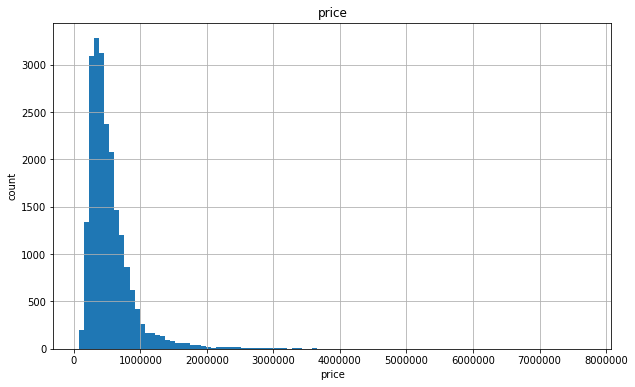

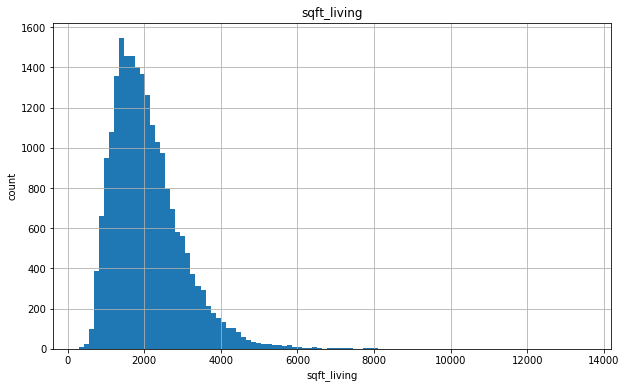

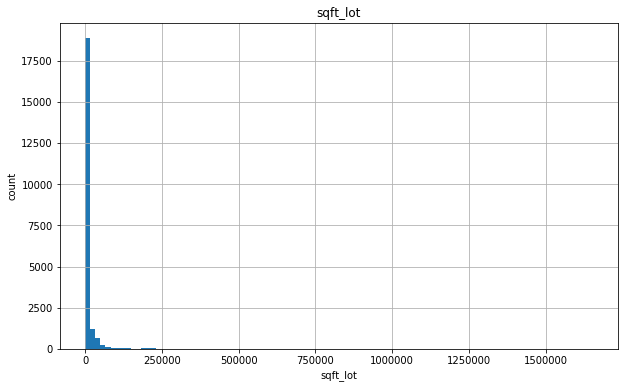

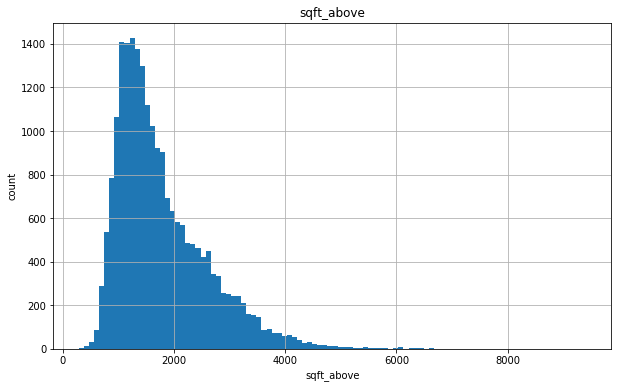

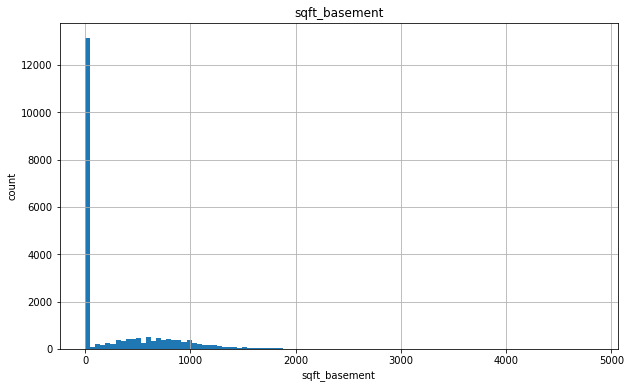

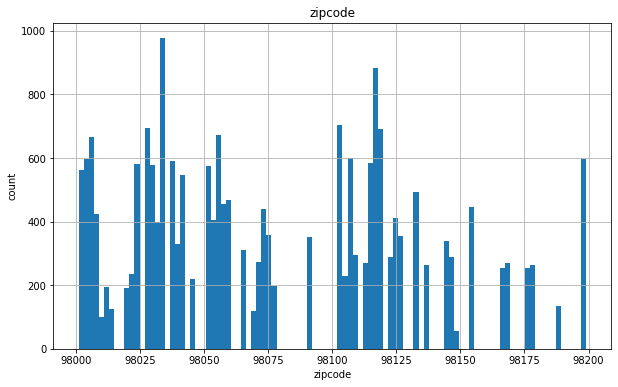

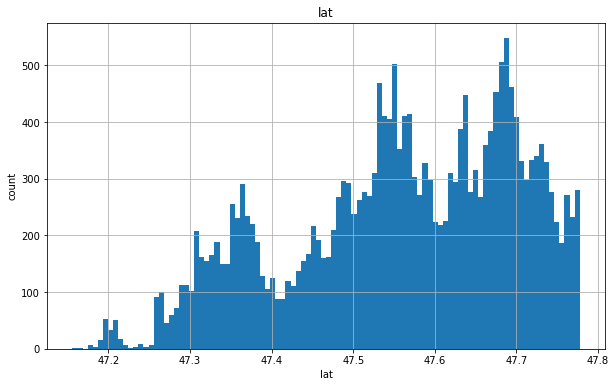

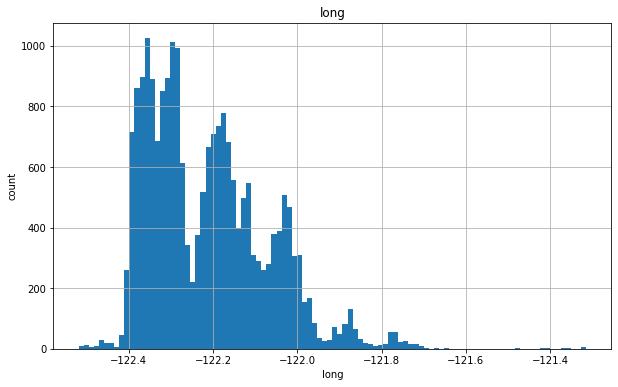

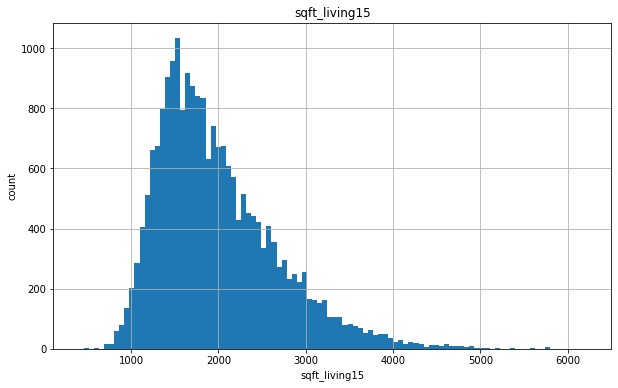

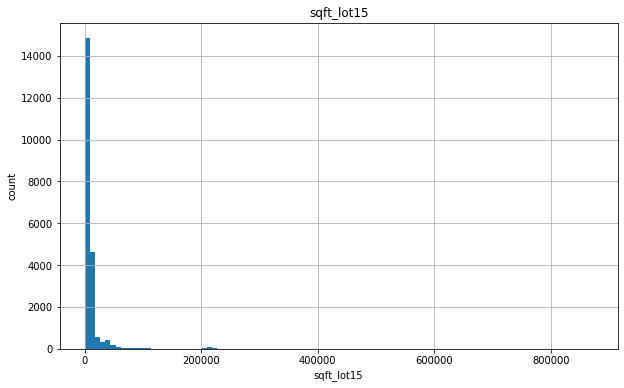

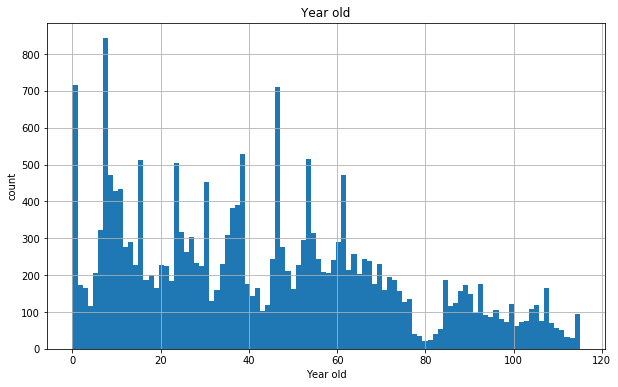

In [141]:
for fea in conti_fea:
    plt.figure(figsize=(10,6))
    x[fea].hist(bins=100)
    plt.xlabel(fea)
    plt.ylabel('count')
    plt.title(fea)
    plt.show()
    


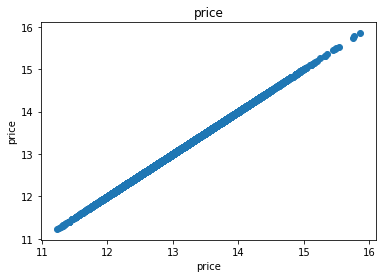

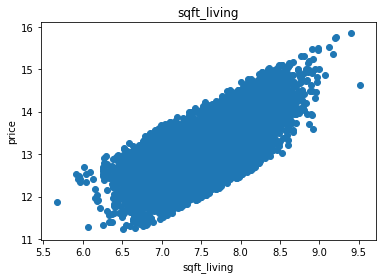

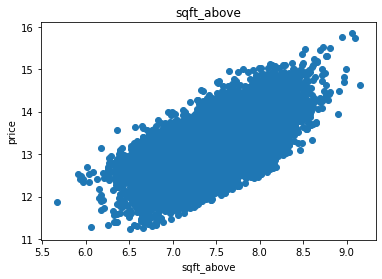

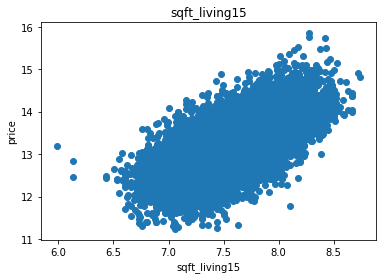

In [142]:
## lograthmic transformation to overcome skewness
log_fea=['price','sqft_living','sqft_above','sqft_living15']
for fea in log_fea:
        x[fea]=np.log(x[fea])
        plt.scatter(x[fea],y=x['price'])
        plt.xlabel(fea)
        plt.ylabel('price')
        plt.title(fea)
        plt.show()

In [143]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,7.073270,0,1955,0,98178,47.5112,-122.257,7.200425,5650,2014,59
1,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,7.682482,400,1951,23,98125,47.7210,-122.319,7.432484,7639,2014,63
2,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,6.646391,0,1933,0,98028,47.7379,-122.233,7.908387,8062,2015,82
3,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,6.956545,910,1965,0,98136,47.5208,-122.393,7.215240,5000,2014,49
4,13.142166,3,2.00,7.426549,8080,1.0,0,0,3,8,7.426549,0,1987,0,98074,47.6168,-122.045,7.495542,7503,2015,28


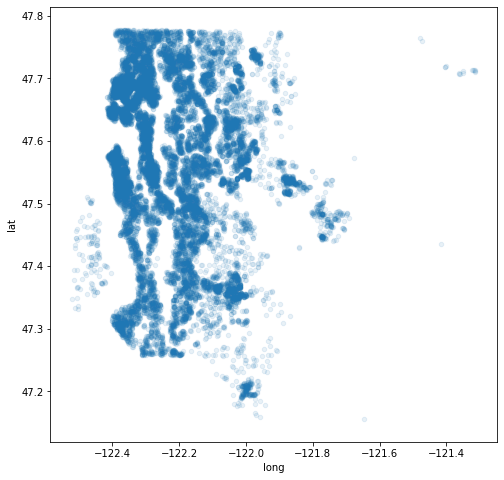

In [144]:
#Visualizing places of high density of data points
x.plot(kind='scatter',x='long',y='lat',alpha=0.1,figsize=(8,8))

In [145]:
x.shape

(21601, 21)

In [146]:
## Feature scaling

data=x.copy()
X=data.iloc[:,1:]
Y=data['price']



In [147]:
y=pd.DataFrame(Y,columns=['price'])
y.shape

(21601, 1)

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,-0.398917,-1.447423,-1.123281,-0.228413,-0.915142,-0.087197,-0.305768,-0.629431,-0.558484,-0.752157,-0.658614,-0.544254,-0.159374,1.870664,-0.352203,-0.306416,-1.035161,-0.260796,-0.690938,0.533216
1,-0.398917,0.175846,0.709476,-0.189987,0.937875,-0.087197,-0.305768,-0.629431,-0.558484,0.672676,0.245158,-0.680482,4.537819,0.880042,1.161735,-0.746632,-0.326688,-0.187967,-0.690938,0.669435
2,-1.474428,-1.447423,-2.128388,-0.123417,-0.915142,-0.087197,-0.305768,-0.629431,-1.409306,-1.750545,-0.658614,-1.293507,-0.159374,-0.932983,1.283687,-0.136010,1.126239,-0.172478,1.447308,1.316478
3,0.676595,1.149808,0.071485,-0.244102,-0.915142,-0.087197,-0.305768,2.443535,-0.558484,-1.025152,1.397468,-0.203684,-0.159374,1.085643,-0.282928,-1.272051,-0.989931,-0.284597,-0.690938,0.192667
4,-0.398917,-0.148808,-0.291469,-0.169760,-0.915142,-0.087197,-0.305768,-0.629431,0.292338,0.074096,-0.658614,0.545569,-0.159374,-0.073198,0.409817,1.198839,-0.134172,-0.192947,1.447308,-0.522485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,-0.398917,0.500500,-0.511681,-0.337488,2.790891,-0.087197,-0.305768,-0.629431,0.292338,-0.144643,-0.658614,1.294822,-0.159374,0.468841,1.005145,-0.938339,-0.630340,-0.412424,-0.690938,-1.305746
21597,0.676595,0.500500,0.458344,-0.224479,0.937875,-0.087197,-0.305768,-0.629431,0.292338,0.818899,-0.658614,1.465107,-0.159374,1.272553,-0.355811,-1.051943,-0.083708,-0.204042,1.447308,-1.441966
21598,-1.474428,-1.772077,-1.466366,-0.332202,0.937875,-0.087197,-0.305768,-0.629431,-0.558484,-1.092949,-0.658614,1.294822,-0.159374,1.235171,0.248177,-0.604627,-1.868221,-0.394189,-0.690938,-1.305746
21599,-0.398917,0.500500,-0.406348,-0.307148,0.937875,-0.087197,-0.305768,-0.629431,0.292338,-0.040015,-0.658614,1.124537,-0.159374,-0.951674,-0.184067,1.028432,-0.879703,-0.420552,1.447308,-1.101417


In [149]:
data_s=pd.concat([y.reset_index(drop=True),X_scaled],axis=1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,Year old
0,12.309982,-0.398917,-1.447423,-1.123281,-0.228413,-0.915142,-0.087197,-0.305768,-0.629431,-0.558484,-0.752157,-0.658614,-0.544254,-0.159374,1.870664,-0.352203,-0.306416,-1.035161,-0.260796,-0.690938,0.533216
1,13.195614,-0.398917,0.175846,0.709476,-0.189987,0.937875,-0.087197,-0.305768,-0.629431,-0.558484,0.672676,0.245158,-0.680482,4.537819,0.880042,1.161735,-0.746632,-0.326688,-0.187967,-0.690938,0.669435
2,12.100712,-1.474428,-1.447423,-2.128388,-0.123417,-0.915142,-0.087197,-0.305768,-0.629431,-1.409306,-1.750545,-0.658614,-1.293507,-0.159374,-0.932983,1.283687,-0.136010,1.126239,-0.172478,1.447308,1.316478
3,13.311329,0.676595,1.149808,0.071485,-0.244102,-0.915142,-0.087197,-0.305768,2.443535,-0.558484,-1.025152,1.397468,-0.203684,-0.159374,1.085643,-0.282928,-1.272051,-0.989931,-0.284597,-0.690938,0.192667
4,13.142166,-0.398917,-0.148808,-0.291469,-0.169760,-0.915142,-0.087197,-0.305768,-0.629431,0.292338,0.074096,-0.658614,0.545569,-0.159374,-0.073198,0.409817,1.198839,-0.134172,-0.192947,1.447308,-0.522485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,12.793859,-0.398917,0.500500,-0.511681,-0.337488,2.790891,-0.087197,-0.305768,-0.629431,0.292338,-0.144643,-0.658614,1.294822,-0.159374,0.468841,1.005145,-0.938339,-0.630340,-0.412424,-0.690938,-1.305746
21597,12.899220,0.676595,0.500500,0.458344,-0.224479,0.937875,-0.087197,-0.305768,-0.629431,0.292338,0.818899,-0.658614,1.465107,-0.159374,1.272553,-0.355811,-1.051943,-0.083708,-0.204042,1.447308,-1.441966
21598,12.904459,-1.474428,-1.772077,-1.466366,-0.332202,0.937875,-0.087197,-0.305768,-0.629431,-0.558484,-1.092949,-0.658614,1.294822,-0.159374,1.235171,0.248177,-0.604627,-1.868221,-0.394189,-0.690938,-1.305746
21599,12.899220,-0.398917,0.500500,-0.406348,-0.307148,0.937875,-0.087197,-0.305768,-0.629431,0.292338,-0.040015,-0.658614,1.124537,-0.159374,-0.951674,-0.184067,1.028432,-0.879703,-0.420552,1.447308,-1.101417


In [150]:
##scaled data stored as csv file for feeding the ML model
data_s.to_csv('scaled_houseKC.csv')